In [1]:
from sklearn import datasets
import pandas as pd
import numpy as np

In [2]:
breastCancer = datasets.load_breast_cancer()

In [3]:
for line in breastCancer['DESCR'].split('\n'):
    print(line)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)
        
        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.
 

In [4]:
import simplere

In [5]:
descStr = breastCancer['DESCR']

In [6]:
params, _, __ = simplere.match(descStr, r'==(.|\n)*==')[0]

In [7]:
params = simplere.match(params, r'[a-zA-Z)( ]+:')
params = [s[0].strip() for s in params]
params = [s[:-1] for s in params]

In [10]:
X = pd.DataFrame(breastCancer.data, columns=params)
y = pd.DataFrame(breastCancer.target, columns=['y'])

In [11]:
X.head()

,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),...,radius (worst),texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst)
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [12]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


In [16]:
breastCancer = pd.DataFrame(np.hstack((X,y)), columns=params + ['y'])

In [18]:
breastCancer.head()

,radius (mean),texture (mean),perimeter (mean),area (mean),smoothness (mean),compactness (mean),concavity (mean),concave points (mean),symmetry (mean),fractal dimension (mean),...,texture (worst),perimeter (worst),area (worst),smoothness (worst),compactness (worst),concavity (worst),concave points (worst),symmetry (worst),fractal dimension (worst),y
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [19]:
breastCancer.shape

(569, 31)

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
reg = LogisticRegression(penalty='l1')

In [22]:
reg.C

1.0

In [23]:
reg.fit(X,y)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [24]:
reg.coef_

array([[ 4.53484563,  0.10044388, -0.25241037, -0.01658515,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.41318022,  0.        , -0.0964901 ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        , -0.35738419, -0.07568142, -0.01508266,  0.        ,
         0.        , -3.52846005,  0.        ,  0.        ,  0.        ]])

In [25]:
reg.intercept_

array([ 0.])

In [39]:
c_vals = [.001, 0.01, 0.1, 1, 10, 100, 1000]

In [43]:
coefs = []
models = []
for val in c_vals:
    r = LogisticRegression(penalty='l1', C=val)
    r.fit(X, y)
    coefs.append(r.coef_[0])
    models.append(r)

C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prasa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [48]:
coefs = np.array(coefs)

In [51]:
coefDf = pd.DataFrame(coefs, index=c_vals)

In [52]:
coefDf

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0.001,0.000000,0.000000,0.069886,0.005112,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.011367,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.010,0.000000,0.000000,0.157010,0.007418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,-0.003989,0.000000,-0.022456,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0.100,0.831927,0.000000,0.214542,-0.004296,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.391196,-0.130657,-0.128611,-0.020089,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1.000,3.699765,0.094854,-0.158629,-0.013766,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.335180,-0.349607,-0.094990,-0.017412,0.000000,0.000000,-3.828974,0.000000,0.000000,0.000000
10.000,1.254263,0.061255,0.088246,-0.011299,0.000000,0.000000,-7.172368,0.000000,0.000000,0.000000,...,0.272120,-0.431963,0.053936,-0.021133,-10.785198,0.440773,-0.907739,-38.311200,-5.717485,0.000000
100.000,1.612722,-0.134719,0.168317,-0.010102,0.000000,38.143887,-7.556119,-110.390337,5.477108,0.000000,...,-0.239247,-0.395972,-0.136703,-0.010765,-41.265018,2.734697,-9.089106,-32.243442,-15.260111,0.000000
1000.000,1.585045,-0.021097,0.222375,0.003006,-38.246601,98.254486,-64.084812,-141.845017,42.109867,-22.882879,...,0.255186,-0.559022,-0.021033,-0.039468,-7.660070,3.715878,-14.537063,0.000000,-41.604251,-113.934064


In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

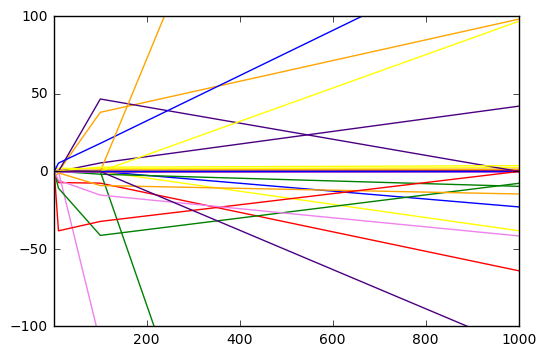

In [67]:
colors = ['violet', 'indigo', 'blue', 'green', 'yellow', 'orange', 'red']
i = 0
plt.ylim((-100, 100))
plt.xlim((c_vals[0], c_vals[-1]))
for _ in coefDf:
    plt.plot(c_vals, coefDf[_].values , color = colors[i % 7])
    i = i + 1

plt.show()

In [68]:
from sklearn.grid_search import GridSearchCV

In [70]:
c_vals

[0.001, 0.01, 0.1, 1, 10, 100, 1000]

In [92]:
gs = GridSearchCV(reg, { 'C' : c_vals + [ 5000, 10000] }, cv=10)

In [93]:
gs.fit(X.values, y.values.reshape(len(y)))

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000, 5000, 10000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [96]:
gs.best_estimator_.coef_

array([[  1.71055168e+00,  -1.32363692e-02,   2.40521285e-01,
          1.26785246e-03,  -4.51979602e+01,   1.03629885e+02,
         -6.82782136e+01,  -1.40078197e+02,   4.26765870e+01,
         -3.72208577e+01,  -1.10334401e+01,   2.51719582e+00,
          1.29390088e+00,  -1.67724933e-01,   0.00000000e+00,
          0.00000000e+00,   1.56143233e+02,  -8.12150586e+02,
          9.18571474e+01,   6.94258430e+02,   3.23282563e-01,
         -5.80381781e-01,  -3.46373630e-02,  -4.06877197e-02,
         -6.01481705e+00,   3.03541317e+00,  -1.45747523e+01,
          0.00000000e+00,  -4.16413253e+01,  -1.16975244e+02]])

In [109]:
np.nonzero(coefDf.iloc[0])[0]

array([ 2,  3, 23], dtype=int64)

In [107]:
coefDf.iloc[0]

0     0.000000
1     0.000000
2     0.069886
3     0.005112
4     0.000000
5     0.000000
6     0.000000
7     0.000000
8     0.000000
9     0.000000
10    0.000000
11    0.000000
12    0.000000
13    0.000000
14    0.000000
15    0.000000
16    0.000000
17    0.000000
18    0.000000
19    0.000000
20    0.000000
21    0.000000
22    0.000000
23   -0.011367
24    0.000000
25    0.000000
26    0.000000
27    0.000000
28    0.000000
29    0.000000
Name: 0.001, dtype: float64

In [114]:
for i in range(len(c_vals)):
    non_z_indices = np.nonzero(coefDf.iloc[i])[0]
    print('At C value: %.5f' % c_vals[i])
    for j in non_z_indices:
        print(params[j])
    print('\n\n')

At C value: 0.00100
perimeter (mean)
area (mean)
area (worst)



At C value: 0.01000
perimeter (mean)
area (mean)
area (standard error)
texture (worst)
area (worst)



At C value: 0.10000
radius (mean)
perimeter (mean)
area (mean)
area (standard error)
radius (worst)
texture (worst)
perimeter (worst)
area (worst)



At C value: 1.00000
radius (mean)
texture (mean)
perimeter (mean)
area (mean)
texture (standard error)
area (standard error)
radius (worst)
texture (worst)
perimeter (worst)
area (worst)
concavity (worst)



At C value: 10.00000
radius (mean)
texture (mean)
perimeter (mean)
area (mean)
concavity (mean)
texture (standard error)
perimeter (standard error)
area (standard error)
concavity (standard error)
radius (worst)
texture (worst)
perimeter (worst)
area (worst)
smoothness (worst)
compactness (worst)
concavity (worst)
concave points (worst)
symmetry (worst)



At C value: 100.00000
radius (mean)
texture (mean)
perimeter (mean)
area (mean)
compactness (mean)
concavity (mean)

# Using Random Forests

In [115]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
forest = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)

In [118]:
forest.fit(X, y)

C:\Users\prasa\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [123]:
list(zip(params, forest.feature_importances_ ))

[('radius (mean)', 0.039029584935425417),
 ('texture (mean)', 0.014970065431811987),
 ('perimeter (mean)', 0.048837799241873446),
 ('area (mean)', 0.049691152561908883),
 ('smoothness (mean)', 0.0064152773220059814),
 ('compactness (mean)', 0.011328866321314161),
 ('concavity (mean)', 0.047278550554497541),
 ('concave points (mean)', 0.10445120041808989),
 ('symmetry (mean)', 0.0037385426048180612),
 ('fractal dimension (mean)', 0.0035790385376484979),
 ('radius (standard error)', 0.013618022053347809),
 ('texture (standard error)', 0.0047200950934817602),
 ('perimeter (standard error)', 0.012628351922253322),
 ('area (standard error)', 0.034952245749168886),
 ('smoothness (standard error)', 0.0042536512356264834),
 ('compactness (standard error)', 0.0044206761949335763),
 ('concavity (standard error)', 0.0063572851029166464),
 ('concave points (standard error)', 0.0049638164591667821),
 ('symmetry (standard error)', 0.0040197004026502293),
 ('fractal dimension (standard error)', 0.005

In [128]:
for imp in np.argsort(forest.feature_importances_)[::-1]:
    print(params[imp] + '  :  ' + str(forest.feature_importances_[imp]))

perimeter (worst)  :  0.129270160054
concave points (worst)  :  0.121227406729
area (worst)  :  0.114679810385
radius (worst)  :  0.111712009868
concave points (mean)  :  0.104451200418
area (mean)  :  0.0496911525619
perimeter (mean)  :  0.0488377992419
concavity (mean)  :  0.0472785505545
radius (mean)  :  0.0390295849354
area (standard error)  :  0.0349522457492
concavity (worst)  :  0.0344180775349
texture (worst)  :  0.0186281631671
compactness (worst)  :  0.0156415017026
texture (mean)  :  0.0149700654318
radius (standard error)  :  0.0136180220533
smoothness (worst)  :  0.012882722985
perimeter (standard error)  :  0.0126283519223
compactness (mean)  :  0.0113288663213
symmetry (worst)  :  0.0101633276444
fractal dimension (worst)  :  0.00705060488102
smoothness (mean)  :  0.00641527732201
concavity (standard error)  :  0.00635728510292
fractal dimension (standard error)  :  0.00507229290572
concave points (standard error)  :  0.00496381645917
texture (standard error)  :  0.0047